# BUSINESS PROBLEM - Predicting customer churn using telco customer data = Binary Classification

![Telcome Image](telecome_image.png)


Customer churn is a critical concern in the telecommunications industry, as retaining existing customers is often more cost-effective than acquiring new ones. Churn can result from multiple factors including tariff plan changes (e.g., downgrading from €50 to €30 plans), contract type shifts (e.g., from monthly to yearly or vice versa), or transitions from postpaid to prepaid plans to avoid recurring billing. More importantly, churn may be driven by dissatisfaction with service quality or customers discovering more competitive offers from rival providers.

To address this, the project applies a structured machine learning approach. I begin with thorough exploratory data analysis (EDA) to identify key patterns and customer behaviors linked to churn. This includes cleaning the data, analyzing service usage, and visualizing relationships across features. Based on these insights, I train and compare five different classification models to predict churn likelihood. The goal is to equip the business with predictive insights that can guide targeted interventions, improve customer satisfaction, and ultimately reduce churn rates


# DATA OVERVIEW

The Telco-Customer-Churn dataset contains 7,043 customer records and 20 service-related attributes (e.g., contract type, tenure, payment method, charges).

Target variable Churn indicates whether a customer left the provider in the last month (Yes / No).

Features span demographics, service subscriptions, and billing details, enabling both behavioral and financial churn analysis.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import matplotlib.ticker as mtick
%matplotlib inline 

We import the core Python libraries necessary for data analysis and visualization:

- numpy and pandas for numerical operations and data manipulation  
- matplotlib.pyplot and seaborn for static visualizations and custom styling  
- plotly.express for interactive plotting and dynamic exploration  
- matplotlib.ticker for formatting axes and tick labels  
- %matplotlib inline to render plots inline within the Jupyter notebook

In [2]:
telecom_net_df = pd.read_csv('Network_Telco-Customer-Churn.csv')
telecom_net_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We load the Telco Customer Churn dataset into a DataFrame using pandas This dataset contains customer account information, service usage details, and churn labels. The head() function is used to preview the first five rows.


In [3]:
telecom_net_df.shape

(7043, 21)

shape returns the number of rows and columns in the dataset 

In [4]:
telecom_net_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

columns lists all feature names (column headers)  

In [5]:
telecom_net_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

dtypes displays the data type of each feature  

In [6]:
telecom_net_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Describe() provides summary statistics for all numeric columns, such as mean, standard deviation, and quartiles

Analysis 

- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month


Text(0.5, 1.0, 'Count of target variable per category')

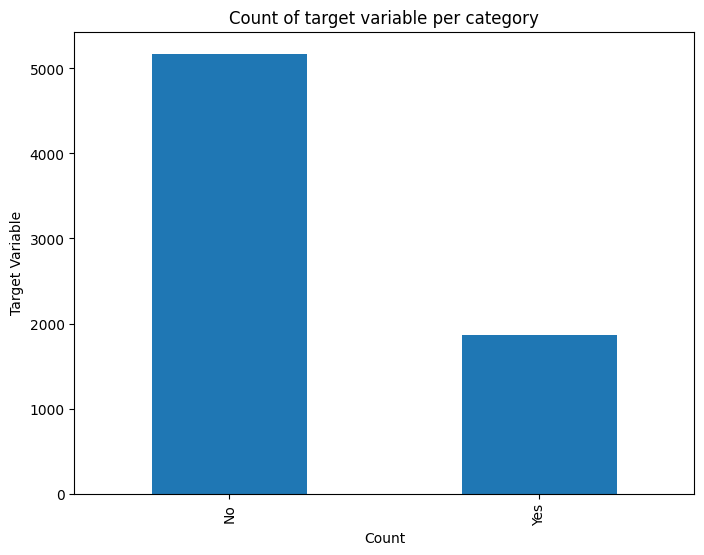

In [7]:
telecom_net_df['Churn'].value_counts().plot(kind = 'bar',figsize = (8,6))
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.title('Count of target variable per category')

The bar chart shows the distribution of the target variable Churn, highlighting a class imbalance the majority of customers did not churn.

In [8]:
100*telecom_net_df['Churn'].value_counts()/ len(telecom_net_df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Approximately 73.5% of customers did not churn, while 26.5% did. This indicates a noticeable class imbalance in the target variable.

In [9]:
telecom_net_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data is highly imbalanced, ratio = 73:27

So we analyse the data with other features while taking the target values separately to get some insights.

In [10]:
telecom_net_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
missing_data = pd.DataFrame((telecom_net_df.isnull().sum())*100 / telecom_net_df.shape[0]).reset_index()
missing_data.columns = ['features','percent_missing']

missing_data.head() 


,features,percent_missing
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0


We calculate the percentage of missing values across all features and visualize them using a point plot. This helps identify which columns may need cleaning or imputation.

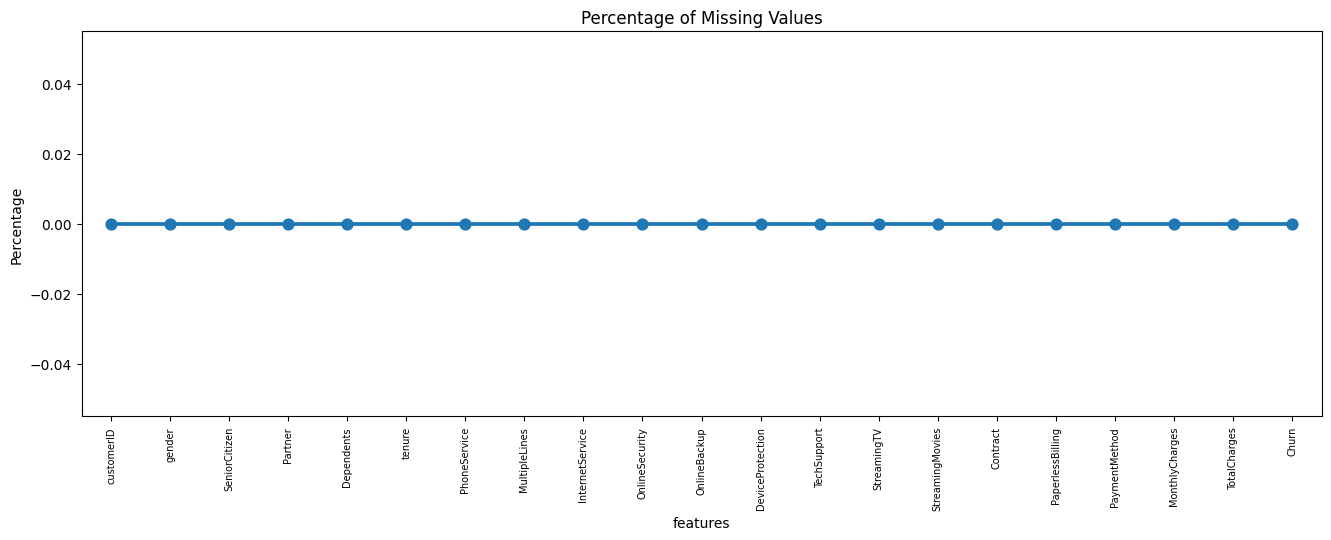

In [12]:
plt.figure(figsize=(16,5))
fig_plot = sns.pointplot(x = 'features',y = 'percent_missing',data = missing_data)
plt.xticks(rotation = 90,fontsize = 7)
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage')
plt.show()

 here ,There are no missing data as we can see

 - For features less missing values we can use regression to predict the missing values or fill with mean of  the values present, depending on the feature

 - For features with high number of mising values it is better to drop those columns as they can give very less insight on data 



Data cleaning

In [13]:
df_telco = telecom_net_df.copy()

In [14]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges need to be coverted to numeric column 

In [15]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'],errors='coerce')


The TotalCharges column is converted to numeric values using pd.to_numeric(), with invalid entries coerced to NaN. This ensures the column is treated correctly in numerical analyses.

In [16]:
# checking for null values 

df_telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We check the dataset for missing values to identify if any cleaning is required after converting TotalCharges.

In [17]:
# checking missing values 

df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the missing values is very less it good to remove it from data instead of replacing from its mean value 

In [18]:
df_telco.dropna(how='any',inplace=True)
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Rows containing any null values are dropped using dropna() to maintain a clean dataset for analysis.

In [ ]:

df_telco.duplicated().sum()

np.int64(0)

We check for any duplicate rows in the dataset. Removing duplicates ensures each customer is uniquely represented.

In [20]:
print(df_telco['tenure'].unique())


[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


We display all unique values in the tenure column to better understand how long customers have been with the service.

In [ ]:
df_telco['tenure'].max()

np.int64(72)

We check the maximum value of tenure to determine the upper bound for creating grouped intervals.

In [ ]:
labels_order = ['{0} - {1}'.format(i,i + 11) for i in range(1,72,12)]

df_telco['Tenure_Grouped'] = pd.cut(df_telco['tenure'],range(1,80,12),right = False,labels = labels_order)

We group customers into tenure intervals of 12 months each (e.g., 1–12, 13–24...) to analyze churn trends across different customer lifecycle stages.

In [23]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Grouped
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


We display the first few rows of the updated dataset to confirm that tenure groups have been added correctly.

In [24]:
df_telco['Tenure_Grouped'].value_counts()

Tenure_Grouped
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

We count the number of customers in each tenure group to understand how the customer base is spread across different lifecycle stages.

In [ ]:
df_telco.drop(columns=['customerID','tenure'],inplace=True)
df_telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Grouped
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


We remove customerID and the original tenure column since they are no longer needed Tenure_Grouped captures the relevant information for analysis.

Data Exploration

In [26]:
px.histogram(df_telco,x = 'gender',title = 'Gender wise Churn',color = 'Churn')

The histogram shows churn distribution by gender. The total number of customers is balanced between males and females, but female customers have a slightly higher churn count. Specifically, 939 female customers have churned compared to 930 male customers. This suggests that gender does not have a strong influence on churn, but a slight difference exists.


In [27]:
fig = px.histogram(df_telco,x = 'Partner',
                    marginal='box',
                    title = 'Distribution of Partners',
                    color_discrete_sequence=['red'])
fig.update_layout(bargap = 0.1)
fig.show()

The chart shows the distribution of customers based on whether they have a partner. Out of the total customers, 3393 have a partner and 3639 do not. The distribution is fairly balanced, though slightly more customers are without a partner.

to check the distribution of all the categorical columns we can create a loop function

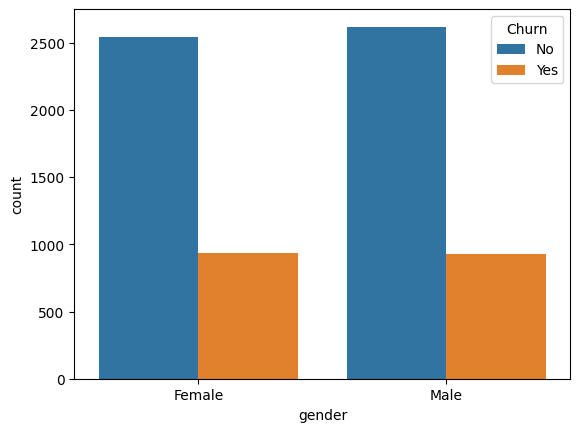

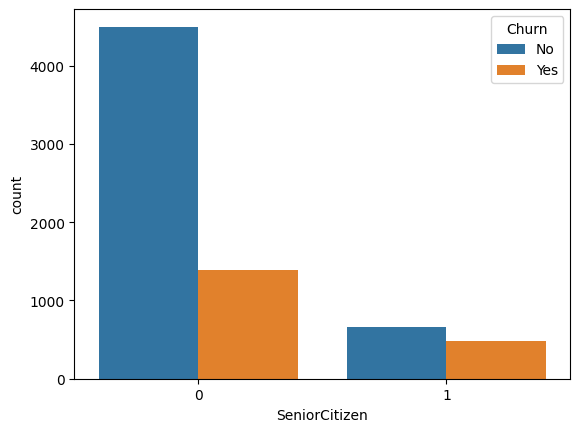

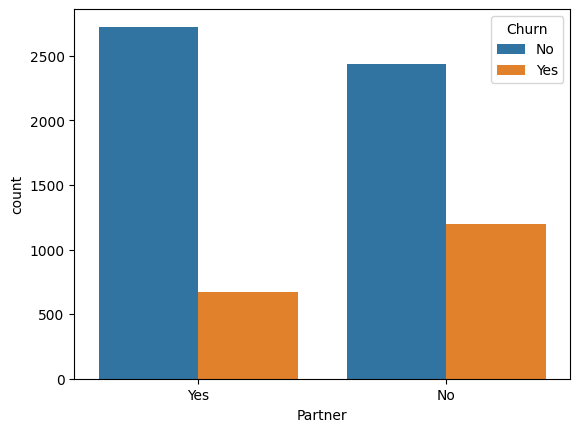

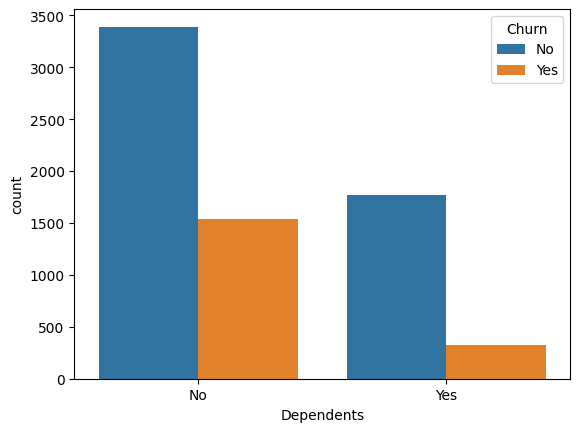

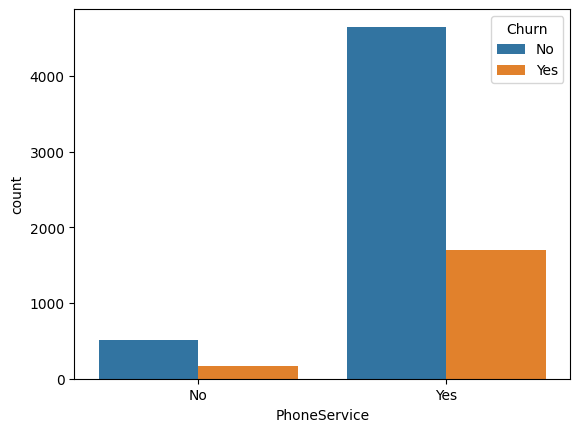

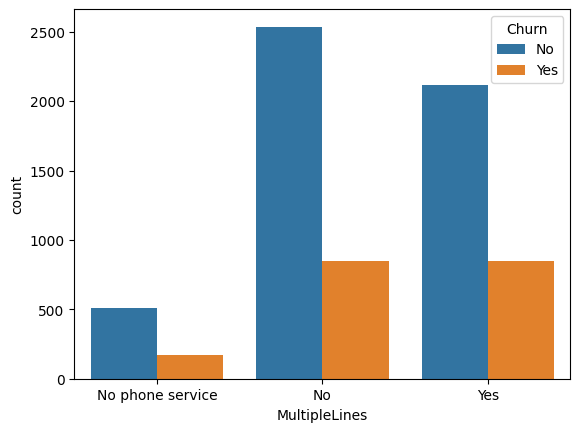

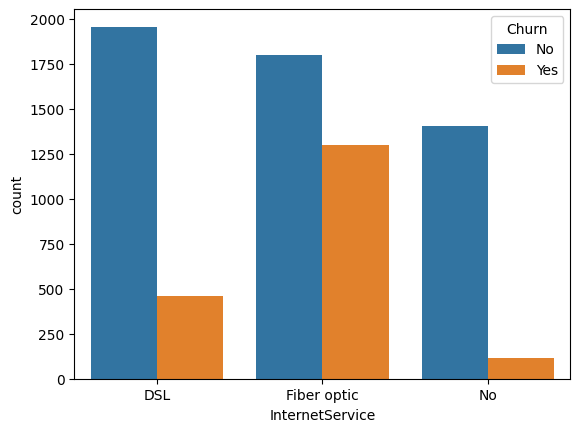

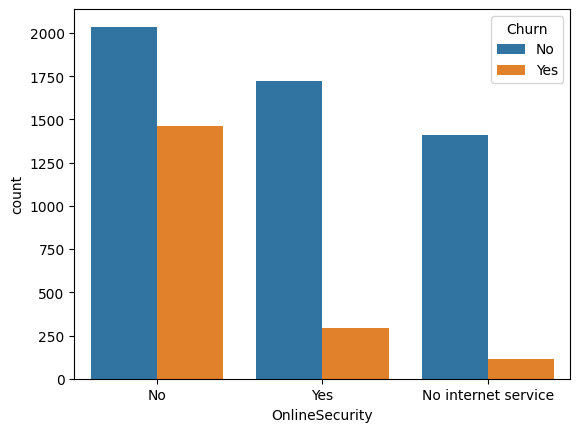

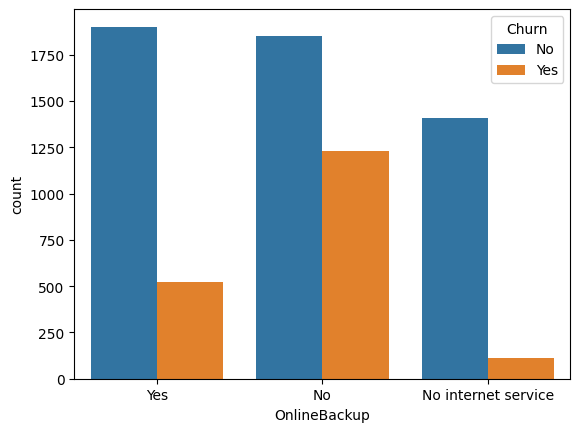

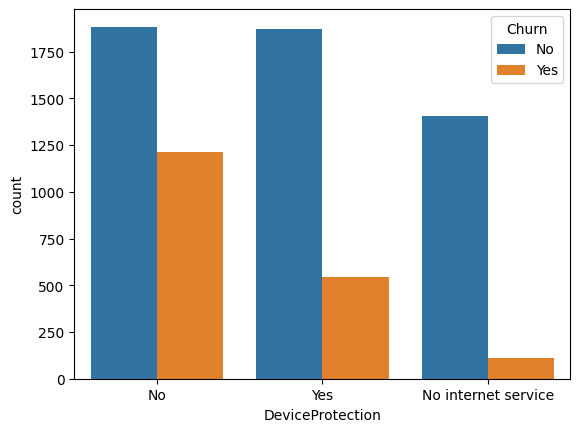

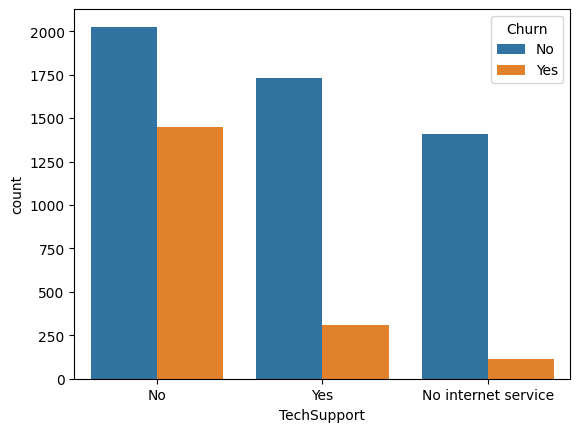

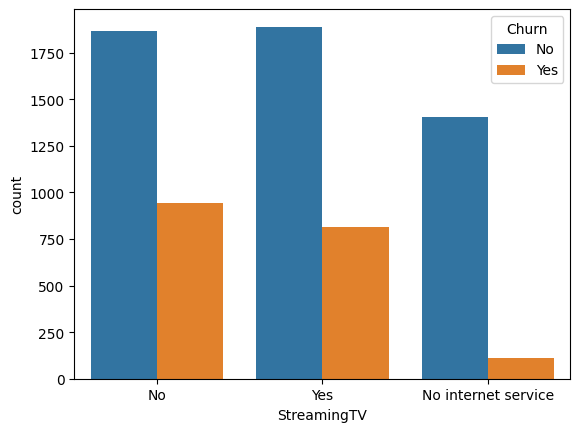

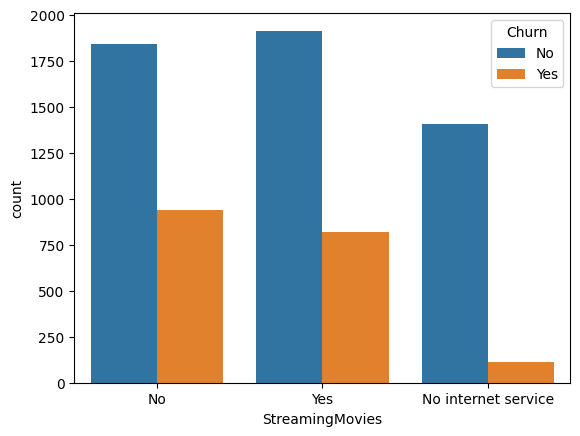

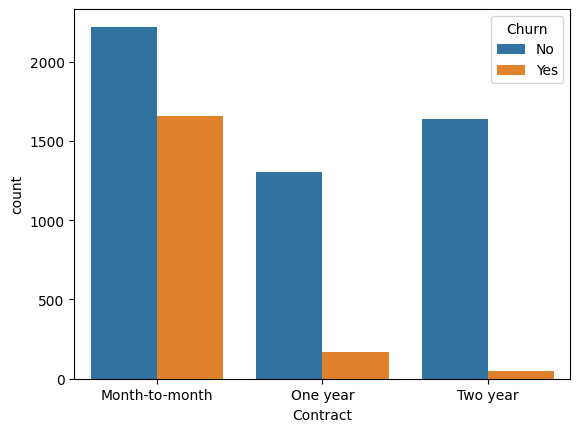

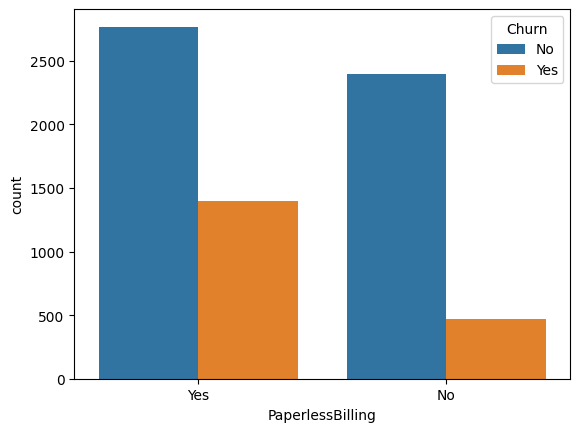

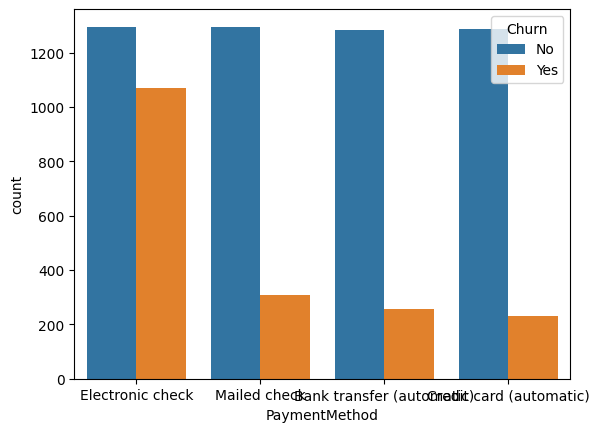

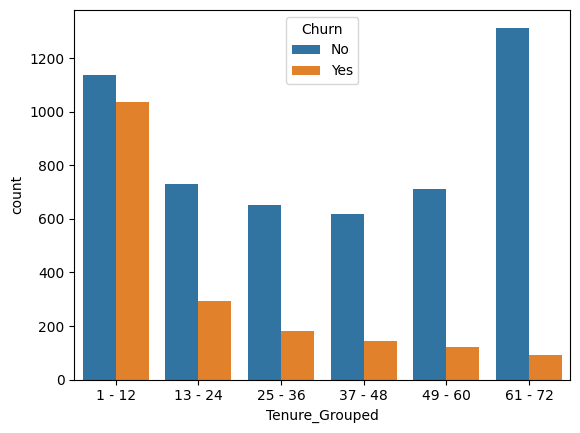

In [28]:
for i,predictor in enumerate(df_telco.drop(columns=['TotalCharges','MonthlyCharges','Churn'])):
    plt.figure(i)
    sns.countplot(data = df_telco, x = predictor , hue='Churn')

We generate count plots for each categorical feature (excluding TotalCharges, MonthlyCharges, and Churn) to visualize how churn varies across different customer attributes. This helps identify patterns or segments with higher churn rates.  
Each plot compares churned and non-churned customers for one predictor, making it easier to detect feature-level influence on customer retention.

Suggestion as per graph 

- In the gender vs churn graph its clear that gender is not the importat feature as the values is not much different 

- in senior citizen vs churn graph we can see that there are more non senior citizen but the ration in senior ctizen is very high 

- In partner graph the churner ratio is high when the candidate is single than when they have partner

- In dependents and partners is negatively corelated , and no dependents are high churners 

- In phone service as well people who has phoneservice plan are more churners 

We this we performared univariate analysis 

Coverting The target Churn in binary numeric values to Yes means 1 and No means 0 

In [29]:
churn_values = {'Yes':1,'No':0}

df_telco['Churn_Values'] = df_telco['Churn'].map(churn_values)

df_telco.head() 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Grouped,Churn_Values
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12,1


We convert the categorical target variable Churn into a binary numerical format using a mapping: Yes → 1 and No → 0. The new encoded column is stored as Churn_Values and will be used for model training.

In [30]:
# drop churn column now 

df_telco.drop(columns=['Churn'],inplace=True)
df_telco.head() 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure_Grouped,Churn_Values
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1 - 12,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,25 - 36,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1 - 12,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,37 - 48,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1 - 12,1


fter encoding the target variable into Churn_Values, we drop the original Churn column to avoid redundancy.

In [31]:
df_telco_dummies = pd.get_dummies(df_telco).astype(int)
df_telco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


We apply one-hot encoding to convert all categorical variables into numerical format using pd.get_dummies(). This step ensures the dataset is ready for machine learning models that require numerical input.

In [ ]:
fig = px.scatter(df_telco_dummies,
                 x = 'MonthlyCharges',
                 y = 'TotalCharges',
                 opacity= 0.5,
                 color = 'MonthlyCharges',
                 title = 'Monthly Charges vs Total Charges',
                 )

fig.update_traces(marker_size = 5)
fig.show()

This scatter plot visualizes the relationship between MonthlyCharges and TotalCharges. As expected, we observe a strong positive correlation customers with higher monthly charges tend to accumulate higher total charges over time. The linear trend reinforces that TotalCharges is largely a function of MonthlyCharges and customer tenure.

Text(0.5, 1.0, 'Monthly Charges by Churn')

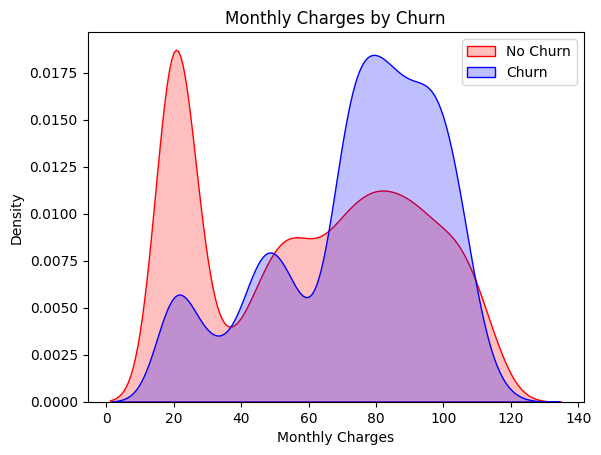

In [33]:
plot = sns.kdeplot(df_telco_dummies['MonthlyCharges'][df_telco_dummies['Churn_Values'] == 0],
                   color = 'red',
                   fill = True
                   )

plot = sns.kdeplot(df_telco_dummies['MonthlyCharges'][df_telco_dummies['Churn_Values']==1],
                   color = 'blue',
                   fill = True
                   )

plot.legend(['No Churn','Churn'],loc = 'upper right')
plot.set_ylabel('Density')
plot.set_xlabel('Monthly Charges')
plot.set_title('Monthly Charges by Churn')

This KDE plot compares the distribution of MonthlyCharges for churned and non-churned customers. We observe that:

- Customers who churned** tend to have higher monthly charges, peaking between 70–100.
- Customers who did not churn show a higher density in the lower charge range, particularly below 50.

This suggests that higher monthly costs may be a contributing factor to customer churn, potentially due to affordability or dissatisfaction with value for money.

Text(0.5, 1.0, 'Total Charges by Churn')

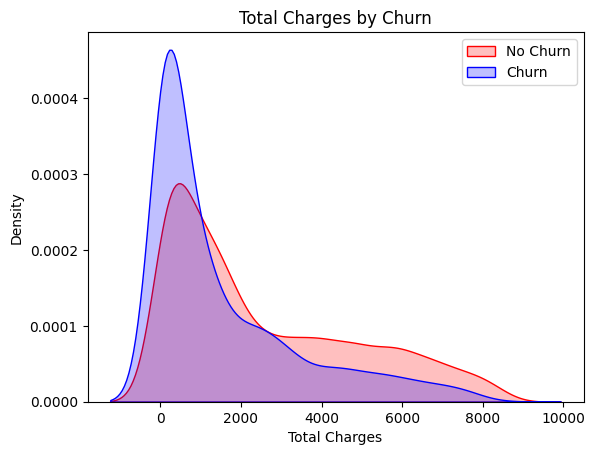

In [34]:
plot = sns.kdeplot(df_telco_dummies['TotalCharges'][df_telco_dummies['Churn_Values'] == 0],
                   color = 'red',
                   fill = True)
plot = sns.kdeplot(df_telco_dummies['TotalCharges'][df_telco_dummies['Churn_Values'] == 1],
                   color = 'blue',
                   fill = True)
plot.legend(['No Churn','Churn'])
plot.set_ylabel('Density')
plot.set_xlabel('Total Charges')
plot.set_title('Total Charges by Churn')

This KDE plot compares the distribution of TotalCharges for customers who churned vs those who stayed. Interestingly, most churners had relatively low total charges, indicating they likely left early in their contract lifecycle. This aligns with the idea that:

- Early churn may occur due to poor onboarding experience or dissatisfaction within the first few months.
- High total charges (i.e., long-term customers) show significantly lower churn rates.

This finding suggests that customer churn is more common among newer customers, and deeper analysis is needed to understand what drives early dissatisfaction or disengagement.

In [35]:
# checking for correlation 

df_telco_dummies['Churn_Values'].corr(df_telco_dummies['MonthlyCharges'])

np.float64(0.19292222469068046)

The Pearson correlation coefficient between MonthlyCharges and Churn_Values is 0.1929, which indicates a weak positive correlation. This suggests that as monthly charges increase, there is a slight tendency for customer churn to increase as well.

While the relationship exists, it is not strong enough to suggest that monthly charges alone are a reliable predictor of churn. However, it may still play a contributing role when combined with other factors such as contract type, tenure, or service satisfaction.

In [36]:
# checking for total charges

df_telco_dummies['Churn_Values'].corr(df_telco_dummies['TotalCharges'])


np.float64(-0.19948512600949886)

The Pearson correlation coefficient between TotalCharges and Churn_Values is -0.1995, indicating a weak negative correlation. This means that customers who have accumulated higher total charges — likely long-term users are slightly less likely to churn.

While the correlation is not strong, it suggests that customer longevity (and overall spending) may be linked to higher retention, possibly due to satisfaction, loyalty, or long-term contract engagement.

In [ ]:
df_telco_dummies.corr().head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn_Values,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Grouped_1 - 12,Tenure_Grouped_13 - 24,Tenure_Grouped_25 - 36,Tenure_Grouped_37 - 48,Tenure_Grouped_49 - 60,Tenure_Grouped_61 - 72
SeniorCitizen,1.000000,0.219829,0.102412,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219829,1.000000,0.651125,0.192922,0.014095,-0.014095,-0.097890,0.097890,0.112360,-0.112360,...,0.042099,0.030277,0.271238,-0.376615,-0.191927,-0.047242,0.009459,0.017877,0.069855,0.185468
TotalCharges,0.102412,0.651125,1.000000,-0.199485,-0.000049,0.000049,-0.319071,0.319071,-0.064653,0.064653,...,0.186118,0.182664,-0.060436,-0.294708,-0.592444,-0.210747,-0.047367,0.083699,0.252902,0.639312
Churn_Values,0.150541,0.192922,-0.199485,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.014095,-0.000049,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.014095,0.000049,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_No,-0.016957,-0.097890,-0.319071,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.016957,0.097890,0.319071,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.210550,0.112360,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090
Dependents_Yes,-0.210550,-0.112360,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.009289,0.023544,0.031419,0.118090


<Axes: >

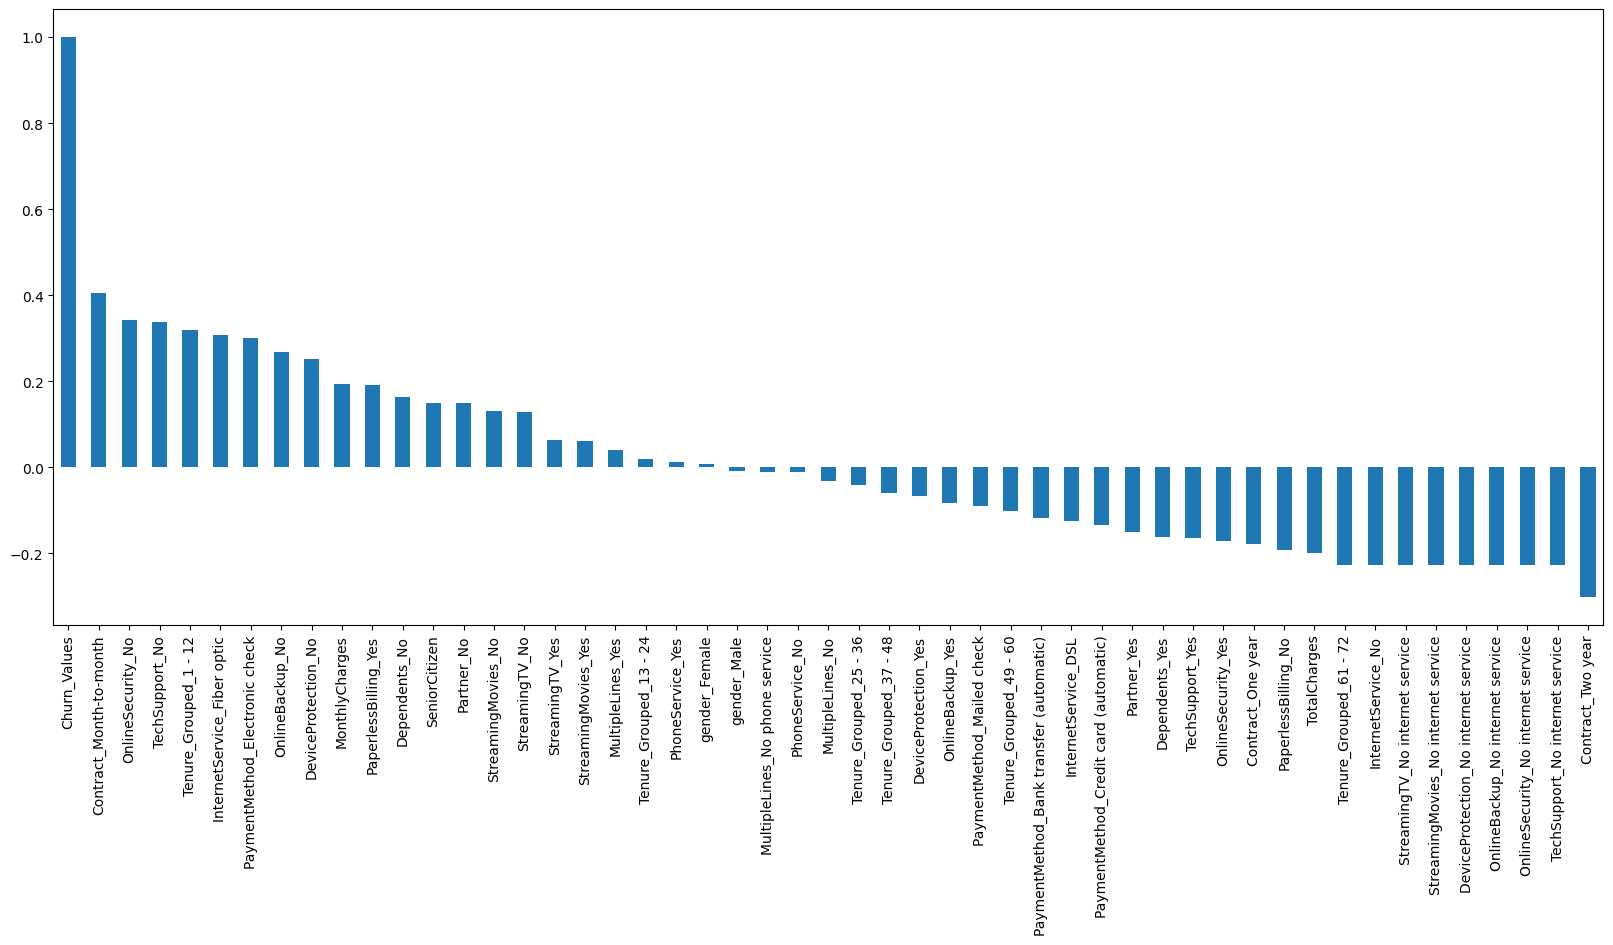

In [38]:
# build a correlation of all predictors with churn 

plt.figure(figsize = (20,8))
df_telco_dummies.corr()['Churn_Values'].sort_values(ascending=False).plot(kind = 'bar')

Insights

- HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

- Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This bar chart displays the correlation between each feature and the target variable Churn_Values. Key takeaways include:

Factors Positively Correlated with Churn (i.e., increase churn risk):

- Month-to-month contracts have the strongest positive correlation with churn, indicating customers on short-term plans are more likely to leave.
- Lack of online security and tech support are associated with higher churn suggesting service-related dissatisfaction.
- Fibre optic internet users show higher churn rates, possibly due to performance issues or higher costs.
- First-year customers (Tenure_Grouped_1 - 12) tend to churn more, highlighting onboarding and early engagement as crucial.

Factors Negatively Correlated with Churn (i.e., reduce churn risk):

 - Long-term contracts (one year or two years) strongly reduce churn likelihood these customers show higher commitment.
- No internet service groups consistently show low churn, likely because they're on minimal plans or not fully engaged.
- Longer tenure groups (5+ years) indicate higher loyalty and lower churn rates

Neutral Factors (little or no impact on churn):

- Gender, PhoneService availability, and Multiple lines have near-zero correlation with churn, implying they do not significantly influence customer retention.

These insights can guide strategic decisions, such as offering loyalty incentives, improving first-year service experience, and enhancing support features to reduce churn risk.




we can all see this through heatmap to verify

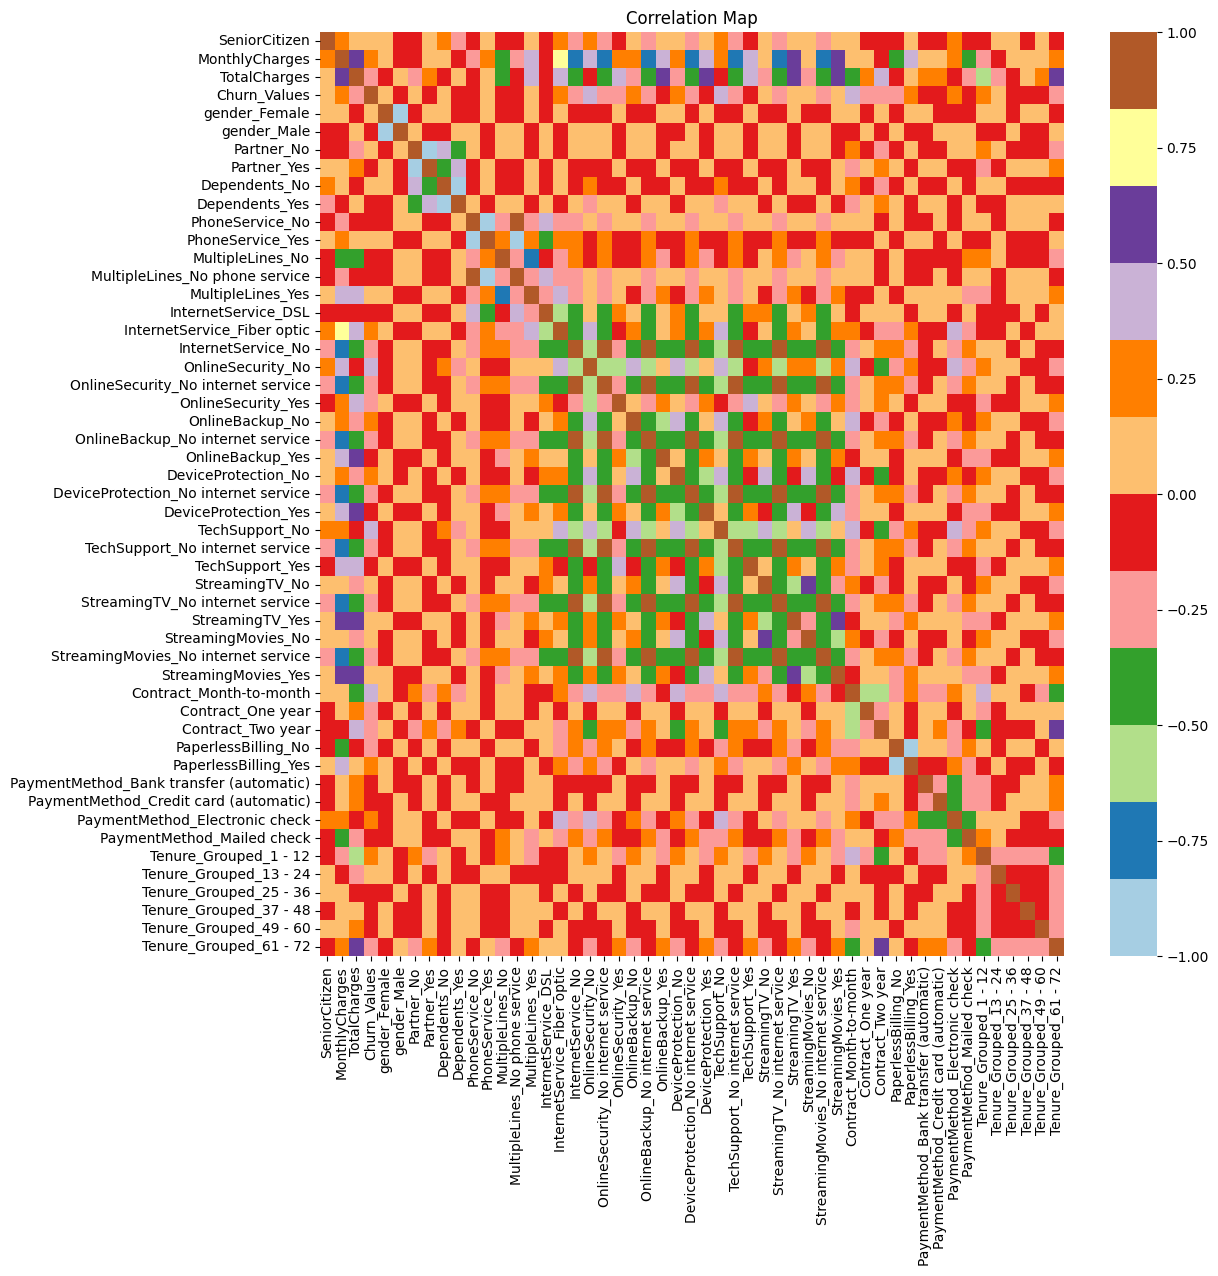

In [39]:
plt.figure(figsize = (12,12))
sns.heatmap(df_telco_dummies.corr(),cmap = 'Paired')
plt.title('Correlation Map')
plt.show()


Bivariate analysis helps us explore the relationship between two variables typically a feature and the target variable (Churn_Values). This allows us to identify meaningful patterns or associations that can inform our modeling and decision-making.

In [40]:
churners = df_telco[df_telco['Churn_Values'] == 1]
non_churners = df_telco[df_telco['Churn_Values'] == 0]


We split the dataset into two groups:  
- churners: customers who have churned (Churn_Values = 1)  
- non_churners: customers who have not churned (Churn_Values = 0)  

This allows for more focused comparisons and targeted analysis between the two groups.

In [41]:
fig = px.bar(churners,
             x = 'PaymentMethod',
             title = 'Churned Customer by Payment Method',
             color_discrete_sequence=['red'])

fig.update_layout(xaxis_title = 'Payment Method',
                  yaxis_title = 'Number of Churned Customers',
                  title_x = 0.5)
fig.show()




This bar chart shows the number of churned customers across different payment methods.

Electronic check has the highest number of churned customers by a significant margin. Other payment methods such as mailed check, bank transfer (automatic), and credit card (automatic) show much lower and fairly similar churn rates.

This indicates that customers using electronic checks may be more prone to churn, possibly due to manual billing processes or less consistent payment behavior. In contrast, automated payment methods seem to be associated with higher retention.

Recommendation: Encourage customers to adopt automatic payment options to potentially reduce churn and improve billing consistency.

In [43]:
fig = px.bar(churners,
             x = 'Contract',
             title = 'Churned Customer by Contract',
             color_discrete_sequence=['blue'])

fig.update_layout(xaxis_title= 'Type of Contract',
                  yaxis_title = 'Number of Churned Customer',
                  title_x = 0.5)

fig.show()

This bar chart shows the number of churned customers across different contract types.

The highest churn is seen among customers with month-to-month contracts. This indicates that customers without long-term commitment are more likely to leave. In contrast, churn is significantly lower among those with one-year and especially two-year contracts, suggesting that longer commitments are associated with better customer retention.

In [47]:
fig = px.histogram(churners,
                   x = 'SeniorCitizen',
                   title = 'Distribution of Senior for Churned Customers',
                   color = 'gender',
                   barmode = 'group',
                   color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(xaxis_title = 'Senior Citizen',
                  yaxis_title = 'Number of Churned Customers',
                  title_x = 0.5)

fig.show()

This chart compares the number of churned customers who are senior citizens (marked as 1) versus non-senior citizens (marked as 0), further broken down by gender.

Observation:
- A significantly higher number of churned customers are not senior citizens.
- Among both senior and non-senior churned customers, the gender distribution is nearly equal, indicating that gender does not play a major role in churn within these age groups.
- The lower churn count among seniors could suggest that older customers tend to remain more loyal or are less likely to change service providers.

This insight can help tailor customer retention strategies differently for senior and non-senior customers.

In [48]:
df_telco_dummies.to_csv('telecom_net_churn.csv')

The cleaned and feature-engineered dataset is saved as a CSV file for use in future machine learning models

Final Summary and Conclusion

Throughout this exploratory data analysis (EDA) of the Telco customer dataset, several meaningful patterns emerged that help explain why customers may be churning. These observations can be crucial for designing targeted strategies to reduce churn and improve customer retention.

Some of the key insights from the analysis are:

Payment Method: Customers who used Electronic Check as their payment method were the most likely to churn. This suggests that these users may prefer less automated or flexible options and could benefit from better engagement or incentives to switch to more secure/automated payment channels.

Contract Type: A large portion of churned customers were on Month-to-Month contracts. This reinforces the idea that lack of commitment leads to higher churn, and offering discounts or benefits for long-term contracts could help in reducing churn.

Technical Services: Customers without Online Security and Tech Support services were significantly more likely to churn. This may indicate that these services contribute to perceived value or satisfaction and should be more proactively promoted.

Customer Tenure: Churn was much higher among customers in their first year (1–12 months). Retention campaigns should particularly focus on onboarding experiences, early engagement, and personalized communication during this initial tenure period.

Age Group: Interestingly, non-senior citizens churn more than senior citizens. This may suggest that younger users are more flexible and demanding, and may require different engagement strategies than senior users.

Charges Relationship: There is a weak positive correlation between Monthly Charges and Churn, implying that as monthly costs rise, so does the risk of churn. On the other hand, there is a weak negative correlation between Total Charges and Churn, suggesting that customers who have stayed longer and accumulated more charges tend to stay, highlighting the value of long-term engagement

EDA to Machine Learning

With this foundational understanding, the next step will be to feed this cleaned and well-structured dataset into machine learning models to predict churn. The goal is to build a robust classification model that can:

Identify high-risk churn customers in advance

Analyze feature importance

Help the business prioritize retention efforts for specific customer segments

The dataset has already been encoded and prepared (dummy variables created), and we’re now ready for modeling using supervised learning techniques such as logistic regression, decision trees, or ensemble models like Random Forest or XGBoost

Supporting Documentation

A separate Word report has also been created to capture all visual insights, observations, and charts in a structured format. This detailed report contains annotated figures and notes that can guide both business decision-makers and technical teams.

For further details and observations, please refer to the attached Data report document.